In [7]:
import sys 
print(sys.path)

['e:\\人工智能课设\\第一次', 'c:\\Users\\chuhu\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.702919634\\pythonFiles', 'c:\\Users\\chuhu\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.702919634\\pythonFiles', 'c:\\Users\\chuhu\\.vscode\\extensions\\ms-toolsai.jupyter-2021.5.702919634\\pythonFiles\\lib\\python', 'E:\\miniconda\\envs\\ml\\python37.zip', 'E:\\miniconda\\envs\\ml\\DLLs', 'E:\\miniconda\\envs\\ml\\lib', 'E:\\miniconda\\envs\\ml', '', 'E:\\miniconda\\envs\\ml\\lib\\site-packages', 'E:\\miniconda\\envs\\ml\\lib\\site-packages\\win32', 'E:\\miniconda\\envs\\ml\\lib\\site-packages\\win32\\lib', 'E:\\miniconda\\envs\\ml\\lib\\site-packages\\Pythonwin', 'E:\\miniconda\\envs\\ml\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\chuhu\\.ipython']


In [1]:
from EightPuzzle import state, EightPuzzleProbem,create_start

# 1. 两种启发函数h1,h2的比较

In [26]:
    import time
    testnum = 1000
    h1_time = []
    h2_time = []
    h1_steps = []
    h2_steps = []
    for i in range(testnum):
        start = create_start()
        #print(start)

        #print('---')
        #print('heuristic 1:')
        tick = time.time()
        ep = EightPuzzleProbem(start,1)
        ep.solve()
        #print(len(ep.steps))
        tock = time.time()
        h1_time.append(tock-tick)
        h1_steps.append(len(ep.steps))
        #print('time cost: {0} s'.format(tock-tick))


        #print('---')
        #print('heuristic 2:')
        tick = time.time()
        ep = EightPuzzleProbem(start,2)
        ep.solve()
        #print(len(ep.steps))
        tock = time.time()
        h2_time.append(tock-tick)
        h2_steps.append(len(ep.steps))
        #print('time cost: {0} s'.format(tock-tick))

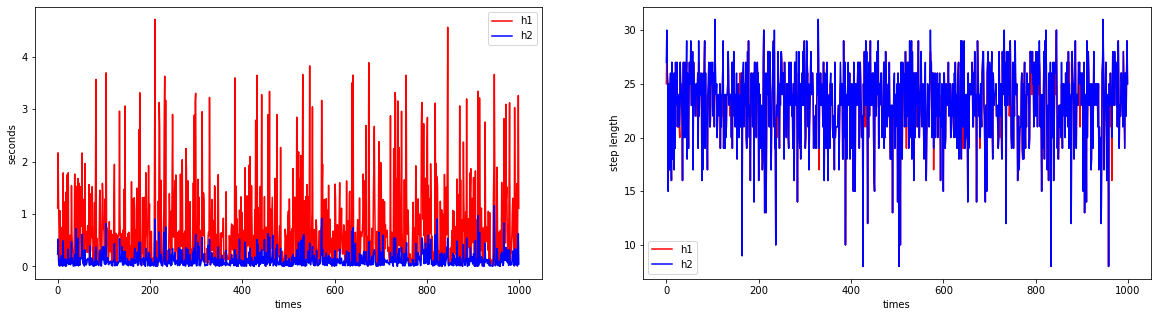

In [29]:
import matplotlib.pyplot as plt 
plt.figure(None,(20,5)) 
plt.subplot(1,2,1)
plt.plot(range(1000),h1_time,'r')
plt.plot(range(1000),h2_time,'b')
plt.xlabel('times')
plt.ylabel('seconds')
plt.legend(['h1','h2'])

plt.subplot(1,2,2)
plt.plot(range(1000),h1_steps,'r')
plt.plot(range(1000),h2_steps,'b')
plt.xlabel('times')
plt.ylabel('step length')
plt.legend(['h1','h2'])


In [30]:
import numpy as np 
h1_meantime = np.mean(np.array(h1_time))
h1_meansteps = np.mean(np.array(h1_steps))
h2_meantime = np.mean(np.array(h2_time)) 
h2_meansteps = np.mean(np.array(h2_steps))
print('h1_meantime : {0} s'.format(h1_meantime))
print('h2_meantime : {0} s'.format(h2_meantime))
print('h1_meansteps : {0}'.format(h1_meansteps))
print('h2_meansteps : {0}'.format(h2_meansteps))

h1_meantime : 0.742831324338913 s
h2_meantime : 0.1353063066005707 s
h1_meansteps : 22.914
h2_meansteps : 23.17


# 2. 搜寻最佳的超参数alpha

In [1]:
from EightPuzzle import state, EightPuzzleProbem,create_start

In [4]:
import numpy as np 
import time 
alpha_seq1 = [1e-2,1e-1,1,10,100,1000]
testnum = 50
timemat = np.empty((len(alpha_seq1),testnum))
for col,alpha in enumerate(alpha_seq1):
    for i in range(testnum):
            start = create_start()
            tick = time.time()
            ep = EightPuzzleProbem(start,2,alpha)
            ep.solve()

            tock = time.time()
            timemat[col,i] = tock-tick


In [5]:
time_mean = np.mean(timemat,axis=1)
print(time_mean)

[0.0229452  0.02820637 0.14169207 4.73133414 7.47149761 6.84450578]


In [6]:
print(timemat)

[[1.10027790e-02 2.50058174e-02 1.40028000e-02 4.50105667e-02
  4.80115414e-02 1.50029659e-02 8.00132751e-03 3.10075283e-02
  6.90155029e-02 8.00132751e-03 2.70061493e-02 1.40028000e-02
  9.00268555e-03 2.90064812e-02 3.10065746e-02 1.90038681e-02
  6.00171089e-03 3.40077877e-02 5.00106812e-03 8.00204277e-03
  2.00042725e-02 1.50034428e-02 1.80034637e-02 1.70042515e-02
  1.00018978e-02 2.20055580e-02 2.90062428e-02 4.00090218e-03
  1.30033493e-02 4.00092602e-02 1.80044174e-02 8.00204277e-03
  5.80127239e-02 1.60038471e-02 5.00106812e-03 8.00275803e-03
  1.50024891e-02 8.00180435e-03 6.00099564e-03 5.00113964e-02
  4.30104733e-02 1.30014420e-02 5.80139160e-02 5.50122261e-02
  9.00220871e-03 9.00197029e-03 2.20046043e-02 2.10049152e-02
  2.80063152e-02 5.30123711e-02]
 [4.70106602e-02 1.60031319e-02 5.70135117e-02 6.60150051e-02
  9.00197029e-03 1.70037746e-02 1.00016594e-02 1.00030899e-02
  5.80134392e-02 8.00108910e-03 5.10122776e-02 8.00204277e-03
  3.70078087e-02 1.60033703e-02 5.401

In [7]:
import numpy as np 
import time 
alpha_seq2 = [1e-4,1e-3,1e-2,1e-1,1]
testnum = 10
timemat = np.empty((len(alpha_seq2),testnum))
for col,alpha in enumerate(alpha_seq2):
    for i in range(testnum):
            start = create_start()
            tick = time.time()
            ep = EightPuzzleProbem(start,2,alpha)
            ep.solve()

            tock = time.time()
            timemat[col,i] = tock-tick
time_mean = np.mean(timemat,axis=1)
print(time_mean)

[0.02850642 0.01160266 0.02250521 0.02000449 0.19534404]


In [9]:
import numpy as np 
import time 
alpha_seq3 = np.arange(1e-4,1e-2,1e-3)
testnum = 10
timemat = np.empty((len(alpha_seq3),testnum))
for col,alpha in enumerate(alpha_seq3):
    for i in range(testnum):
            start = create_start()
            tick = time.time()
            ep = EightPuzzleProbem(start,2,alpha)
            ep.solve()

            tock = time.time()
            timemat[col,i] = tock-tick
time_mean = np.mean(timemat,axis=1)
print(time_mean)

[0.03060682 0.0313072  0.0276062  0.03040679 0.017804   0.01960444
 0.01310298 0.01650379 0.02470548 0.03620822]


In [10]:
import numpy as np 
import time 
alpha_seq3 = np.arange(0.0051,0.0071,1e-4)
testnum = 20
timemat = np.empty((len(alpha_seq3),testnum))
for col,alpha in enumerate(alpha_seq3):
    for i in range(testnum):
            start = create_start()
            tick = time.time()
            ep = EightPuzzleProbem(start,2,alpha)
            ep.solve()

            tock = time.time()
            timemat[col,i] = tock-tick
time_mean = np.mean(timemat,axis=1)
print(time_mean)

[0.03510003 0.03160717 0.02655607 0.02070466 0.03040694 0.0247556
 0.02330525 0.03610811 0.02575585 0.03135706 0.0226051  0.01880425
 0.02420546 0.03335754 0.02485558 0.02635595 0.02195491 0.03220726
 0.02450557 0.02815638]


In [3]:
import numpy as np 
import time 
alpha_seq4 = np.arange(0.0062-5*0.00001,0.0062+5*0.00001,0.00001)
testnum = 20
timemat = np.empty((len(alpha_seq4),testnum))
for col,alpha in enumerate(alpha_seq4):
    for i in range(testnum):
            start = create_start()
            tick = time.time()
            ep = EightPuzzleProbem(start,2,alpha)
            ep.solve()

            tock = time.time()
            timemat[col,i] = tock-tick
time_mean = np.mean(timemat,axis=1)
print(time_mean)

[0.02255509 0.02660605 0.02205492 0.03320752 0.0251557  0.02285513
 0.03145711 0.02910656 0.02810638 0.02665601]


alpha = 0.0059

In [7]:
import numpy as np 
import time 
testnum = 1000
timemat = np.empty((2,testnum))

for i in range(testnum):
        start = create_start()

        tick = time.time()
        ep = EightPuzzleProbem(start,2,0.0059)
        ep.solve()

        tock = time.time()
        timemat[0,i] = tock-tick

        tick = time.time()
        ep = EightPuzzleProbem(start,2,1)
        ep.solve()

        tock = time.time()
        timemat[1,i] = tock-tick
time_mean = np.mean(timemat,axis=1)
print(time_mean)

[0.02504964 0.15531654]


"\nplt.subplot(1,2,2)\nplt.plot(range(1000),h1_steps,'r')\nplt.plot(range(1000),h2_steps,'b')\nplt.xlabel('times')\nplt.ylabel('step length')\nplt.legend(['h1','h2'])\n"

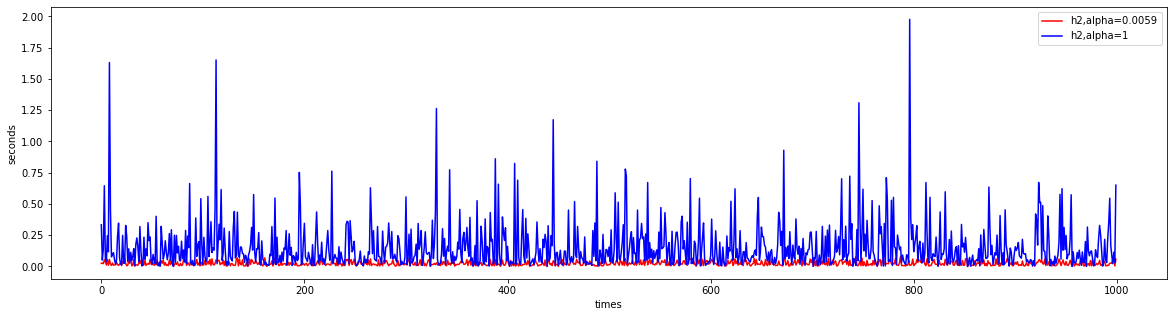

In [8]:
import matplotlib.pyplot as plt

plt.figure(None,(20,5)) 
#plt.subplot(1,2,1)
plt.plot(range(1000),timemat[0,:],'r')
plt.plot(range(1000),timemat[1,:],'b')
plt.xlabel('times')
plt.ylabel('seconds')
plt.legend(['h2,alpha=0.0059','h2,alpha=1'])

'''
plt.subplot(1,2,2)
plt.plot(range(1000),h1_steps,'r')
plt.plot(range(1000),h2_steps,'b')
plt.xlabel('times')
plt.ylabel('step length')
plt.legend(['h1','h2'])
'''

# 3. 逆序数作为启发函数

In [2]:
    import time
    testnum = 100
    h1_time = []
    h2_time = []
    h1_steps = []
    h2_steps = []
    for i in range(testnum):
        start = create_start()
        #print(start)

        #print('---')
        #print('heuristic 1:')
        tick = time.time()
        ep = EightPuzzleProbem(start,3,1)
        ep.solve()
        #print(len(ep.steps))
        tock = time.time()
        h1_time.append(tock-tick)
        h1_steps.append(len(ep.steps))
        #print('time cost: {0} s'.format(tock-tick))


        #print('---')
        #print('heuristic 2:')
        tick = time.time()
        ep = EightPuzzleProbem(start,2,0.0059)
        ep.solve()
        #print(len(ep.steps))
        tock = time.time()
        h2_time.append(tock-tick)
        h2_steps.append(len(ep.steps))
        #print('time cost: {0} s'.format(tock-tick))

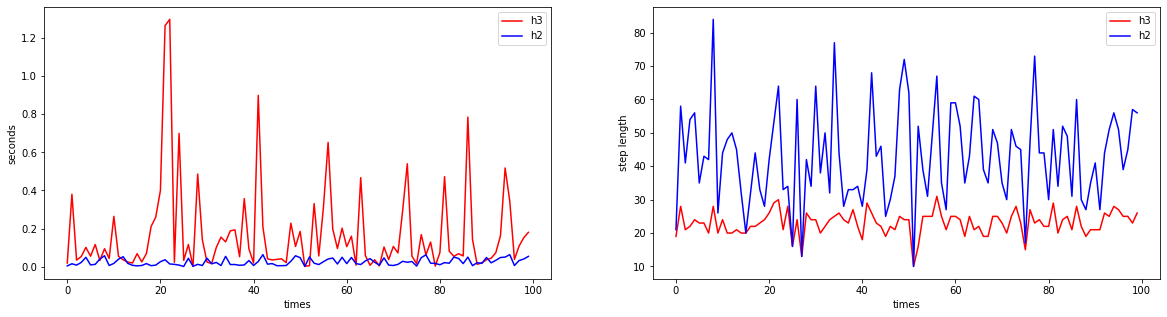

In [3]:
import matplotlib.pyplot as plt 
plt.figure(None,(20,5)) 
plt.subplot(1,2,1)
plt.plot(range(100),h1_time,'r')
plt.plot(range(100),h2_time,'b')
plt.xlabel('times')
plt.ylabel('seconds')
plt.legend(['h3','h2'])

plt.subplot(1,2,2)
plt.plot(range(100),h1_steps,'r')
plt.plot(range(100),h2_steps,'b')
plt.xlabel('times')
plt.ylabel('step length')
plt.legend(['h3','h2'])


# 4. 总体比较(h1,h2,h2+alpha,h3)

In [8]:
    import time
    import matplotlib.pyplot as plt 
    testnum = 1000
    h1_time = []
    h2_time = []
    h1_steps = []
    h2_steps = []
    h2alpha_time = []
    h2alpha_steps = []
    h3_time = []
    h3_steps = []

    for i in range(testnum):

        start = create_start()

        tick = time.time()
        ep = EightPuzzleProbem(start,1,1)
        ep.solve()
        tock = time.time()
        h1_time.append(tock-tick)
        h1_steps.append(len(ep.steps))

        tick = time.time()
        ep = EightPuzzleProbem(start,2,1)
        ep.solve()
        tock = time.time()
        h2_time.append(tock-tick)
        h2_steps.append(len(ep.steps))

        tick = time.time()
        ep = EightPuzzleProbem(start,2,0.0059)
        ep.solve()
        tock = time.time()
        h2alpha_time.append(tock-tick)
        h2alpha_steps.append(len(ep.steps))

        tick = time.time()
        ep = EightPuzzleProbem(start,3,1)
        ep.solve()
        tock = time.time()
        h3_time.append(tock-tick)
        h3_steps.append(len(ep.steps))

    plt.figure(None,(20,5)) 
    plt.subplot(1,2,1)
    plt.plot(range(10),h1_time,'r')
    plt.plot(range(10),h2_time,'b')
    plt.plot(range(10),h2alpha_time,'g')
    plt.plot(range(10),h3_time,'cyan')
    plt.xlabel('trials')
    plt.ylabel('seconds')
    plt.legend(['h1','h2','h2-alpha','h3'])

    plt.subplot(1,2,2)
    plt.plot(range(10),h1_steps,'r')
    plt.plot(range(10),h2_steps,'b')
    plt.plot(range(10),h2alpha_steps,'g')
    plt.plot(range(10),h3_steps,'cyan')
    plt.xlabel('trials')
    plt.ylabel('step length')
    plt.legend(['h1','h2','h2-alpha','h3'])


ValueError: x and y must have same first dimension, but have shapes (10,) and (1000,)

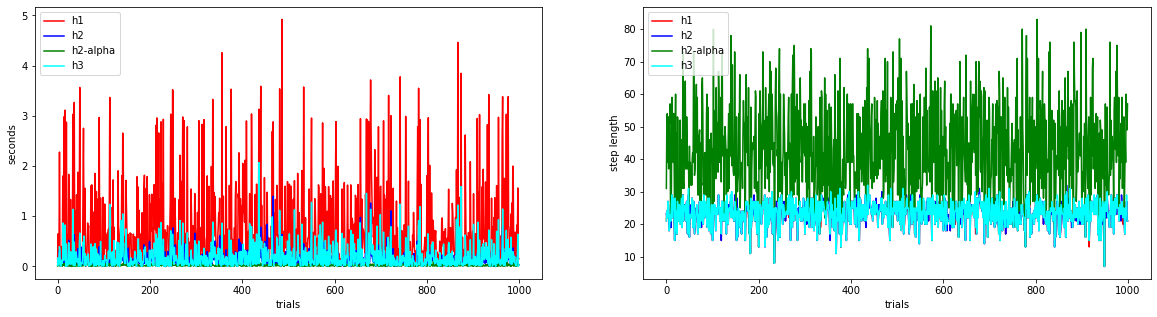

In [10]:
    plt.figure(None,(20,5)) 
    plt.subplot(1,2,1)
    plt.plot(range(1000),h1_time,'r')
    plt.plot(range(1000),h2_time,'b')
    plt.plot(range(1000),h2alpha_time,'g')
    plt.plot(range(1000),h3_time,'cyan')
    plt.xlabel('trials')
    plt.ylabel('seconds')
    plt.legend(['h1','h2','h2-alpha','h3'])

    plt.subplot(1,2,2)
    plt.plot(range(1000),h1_steps,'r')
    plt.plot(range(1000),h2_steps,'b')
    plt.plot(range(1000),h2alpha_steps,'g')
    plt.plot(range(1000),h3_steps,'cyan')
    plt.xlabel('trials')
    plt.ylabel('step length')
    plt.legend(['h1','h2','h2-alpha','h3'])

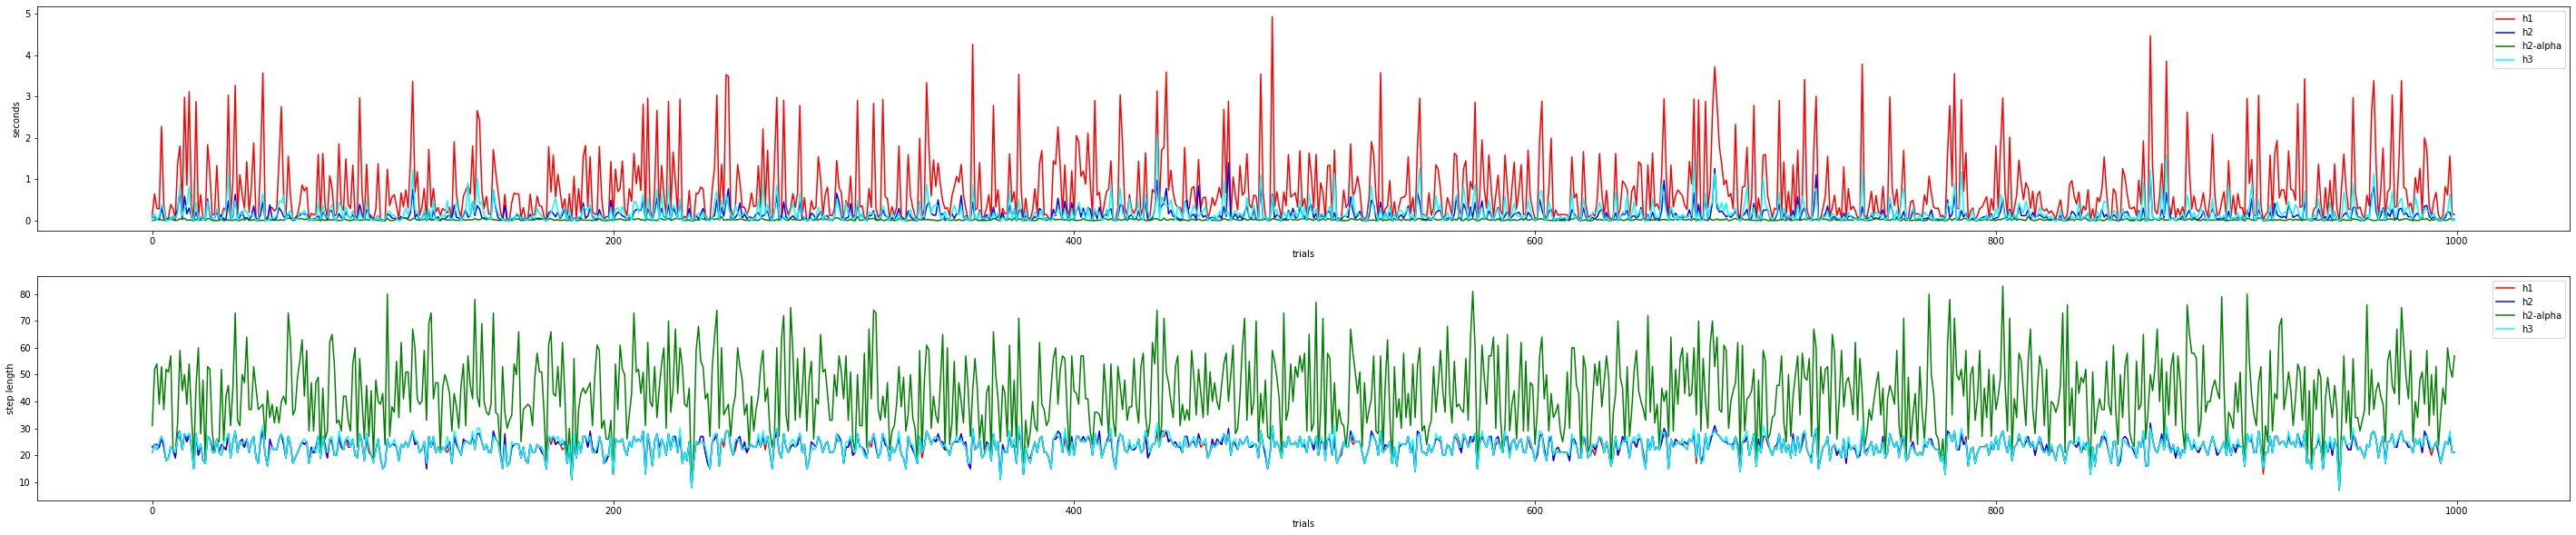

In [12]:
    plt.figure(None,(50,10)) 
    plt.subplot(2,1,1)
    plt.plot(range(1000),h1_time,'r')
    plt.plot(range(1000),h2_time,'b')
    plt.plot(range(1000),h2alpha_time,'g')
    plt.plot(range(1000),h3_time,'cyan')
    plt.xlabel('trials')
    plt.ylabel('seconds')
    plt.legend(['h1','h2','h2-alpha','h3'])

    plt.subplot(2,1,2)
    plt.plot(range(1000),h1_steps,'r')
    plt.plot(range(1000),h2_steps,'b')
    plt.plot(range(1000),h2alpha_steps,'g')
    plt.plot(range(1000),h3_steps,'cyan')
    plt.xlabel('trials')
    plt.ylabel('step length')
    plt.legend(['h1','h2','h2-alpha','h3'])

In [13]:
import numpy as np
h1_meantime = np.mean(np.array(h1_time))
h2_meantime = np.mean(np.array(h2_time))
h2alpha_meantime = np.mean(np.array(h2alpha_time))
h3_meantime = np.mean(np.array(h3_time))

h1_meansteps = np.mean(np.array(h1_steps))
h2_meansteps = np.mean(np.array(h2_steps))
h2alpha_meansteps = np.mean(np.array(h2alpha_steps))
h3_meansteps = np.mean(np.array(h3_steps))

print(h1_meantime,h2_meantime,h2alpha_meantime,h3_meantime)
print(h1_meansteps,h2_meansteps,h2alpha_meansteps,h3_meansteps)

0.7467046732902527 0.14233965730667114 0.025168694734573366 0.20077387952804565
22.986 23.29 42.958 23.392


<BarContainer object of 4 artists>

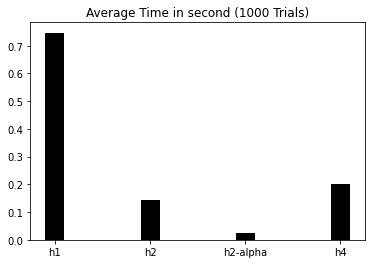

In [22]:
plt.figure() 
plt.title('Average Time in second (1000 Trials)')
plt.bar(['h1','h2','h2-alpha','h4'],[h1_meantime,h2_meantime,h2alpha_meantime,h3_meantime],width=0.2,color='black')



<BarContainer object of 4 artists>

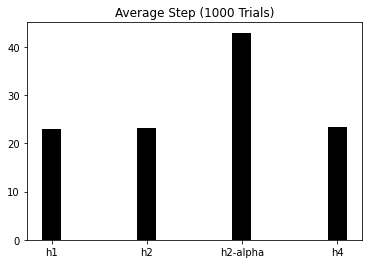

In [23]:
plt.figure() 
plt.title('Average Step (1000 Trials)')
plt.bar(['h1','h2','h2-alpha','h4'],[h1_meansteps,h2_meansteps,h2alpha_meansteps,h3_meansteps],width=0.2,color='black',)

